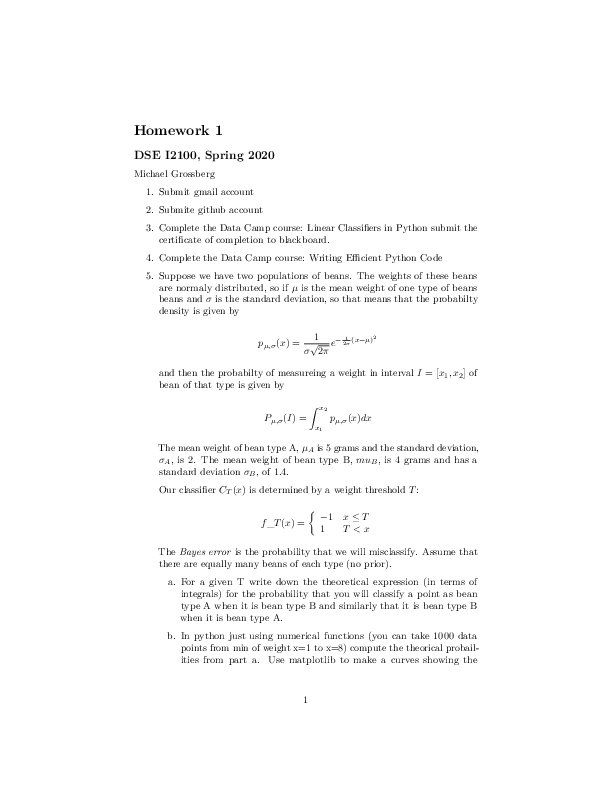

In [1]:
import wand
from wand.image import Image as WImage
image = WImage(filename='hw1.pdf')
image

In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
mu_A = 5 #grams
sig_A = 2 #unit

mu_B = 4 #grams
sig_B = 1.4 #unit

In [4]:
def threshold(x,T):
    if x <= T:
        return -1
    return 1

# #5 Bayes Theorem– 
## Conditional Probability

# $$P(Y|X) = \frac{P(X|Y) * P(Y)}{P(X)}$$

# $$Posterior = \frac{Likelihood * Prior}{Evidence}$$

# #5a Bayes Error – 
## The probability we'll misclassify
# $$1- \Sigma_{C_i  ≠ C_{max, x}} \int \limits_{x ∈ H_i} [P(C_i|x)* p(x)]\ dx $$

https://en.wikipedia.org/wiki/Bayes_error_rate

In [5]:
xA = np.arange(mu_A*-3.5*sig_A,mu_A*3.5*sig_A,0.001)
xB = np.arange(mu_B*-3.5*sig_B,mu_B*3.5*sig_B,0.001)

In [6]:
yA = (np.e**(-(xA-mu_A)**2))/(np.pi*2*sig_A)**.5
yB = (np.e**(-(xB-mu_B)**2))/(np.pi*2*sig_B)**.5

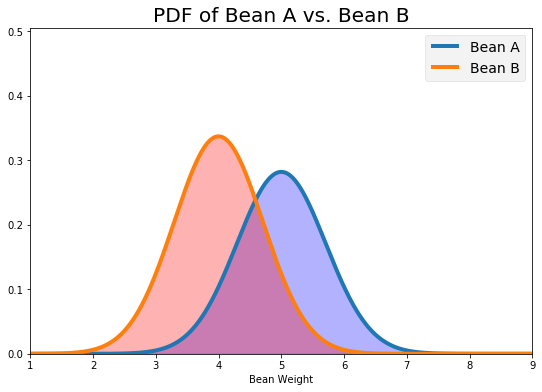

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(xA,yA)

ax.fill_between(xA,yA,0, alpha=0.3, color='b')
#ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4+mu_A,4+mu_A])
ax.set_xlabel('Bean Weight')
ax.set_ylim(ymin=0,ymax=1.5*max(max(yA),max(yB)))
ax.set_title('PDF of Bean A vs. Bean B')
ax.legend(['Bean A'])

ax.plot(xB,yB)
ax.fill_between(xB,yB,0, alpha=0.3, color='r')
ax.legend(['Bean A','Bean B'])

#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [8]:
np.array((max(yA)))

array(0.28209479)

In [9]:
np.array((max(yB)))

array(0.33716777)

In [10]:
max(max(yA),max(yB))

0.3371677656723677

In [11]:
def normFunc(x,mu,sig):
    return (np.e**(-(x-mu)**2))/(np.pi*2*sig)**.5

# typeII_domain = np.arange(1,8,.001)
# misClassify_A = normFunc(typeII_domain,mu_B,sig_B)
# misClassify_B = normFunc(typeII_domain,mu_A,sig_A)

# cumsum = sum(.001*np.minimum(misClassify_B,misClassify_A))

# print(cumsum)

In [12]:
from numpy import random as nr
nr.seed = 100

In [13]:
#nr.randn?

In [14]:
#nr.standard_normal?

In [15]:
set_a = mu_A + sig_A * nr.randn(5000)
set_b = mu_B + sig_B * nr.randn(5000)

In [16]:
set_a_prime = set_a[set_a>=1]
set_a_prime = set_a_prime[set_a_prime<=8]
len(set_a_prime)

4569

In [17]:
set_b_prime = set_b[set_a>=1]
set_b_prime = set_b_prime[set_b_prime<=8]
len(set_b_prime)

4894

In [18]:
set_beans = [ (a, 'A') for a in set_a_prime]
set_beans = set_beans + [(b, 'B') for b in set_b_prime]
len(set_beans)

9463

In [19]:
trial = [['A','B'][nr.randint(0,2)] for i in range(1000)]
len(trial)

1000

# Simulated Bayes Error

In [20]:
t = 4
err = 0.0001

while abs(normFunc(t,mu_A,sig_A)-normFunc(t,mu_B,sig_B))>=err:
    t += 0.001
print('Optimal Threshold is:',t)

Optimal Threshold is: 4.589000000000197


## Optimal threshold is 
### 4.589 lbs

In [21]:
misClass = 0
nr.shuffle(set_beans)

for i in range(1000):
    x = set_beans[i][0]
    pool = set_beans[i][1]
    if x <= t and pool=='A':
        misClass+=1
    elif x >= t and pool=='B':
        misClass+=1

print('Simulated Bayes error is:',misClass/1000)

Simulated Bayes error is: 0.373


## Bayes error
## ~38%

# Making Fake data

## #6a Using sklearn.datasets.make_blobs
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [22]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

In [23]:
centers = [[1, 1], [-1, -1]]
X, y = make_blobs(n_samples=500, n_features=2, 
        centers=centers, cluster_std=1.0/8, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

In [24]:
print(X.shape)
y;

(500, 2)


In [25]:

df = pd.DataFrame({'x0':X.T[0], 
                   'x1':X.T[1],
                   'y': y,
                   'target':(np.array(['Blue','Red'])[y])})
df.head()

,x0,x1,y,target
0,-0.779764,-1.160919,1,Red
1,0.844115,0.976846,0,Blue
2,1.006412,0.934966,0,Blue
3,1.025649,0.923413,0,Blue
4,-0.980909,-1.140188,1,Red


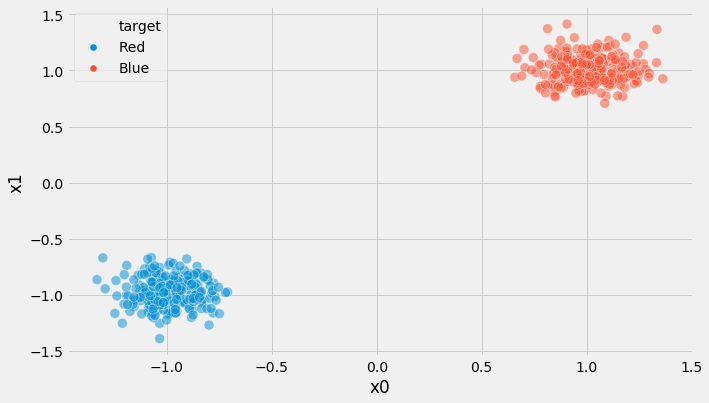

In [26]:
fig, ax = plt.subplots(1,figsize=(10,6))
_=sns.scatterplot(x='x0',y='x1',hue='target', data=df,ax=ax,alpha=.5,s=100)

## #6b Using numpy

In [27]:
a=nr.randn(500,2)

In [28]:
blob1= [[round(1+1/8*i[0],2), round(1+1/8*i[1],2)] for i in a[:250]]
blob1[:5]

[[0.78, 1.01], [1.05, 1.02], [1.14, 1.12], [0.96, 1.01], [1.11, 0.99]]

In [29]:
blob2= [[round(-1+1/8*i[0],2), round(-1+1/8*i[1],2)] for i in a[250:]]
blob2[:5]

[[-1.27, -0.77], [-1.1, -0.79], [-1.05, -0.88], [-0.92, -0.95], [-1.03, -1.07]]

In [30]:
df = pd.DataFrame(blob1+blob2,columns=['x0','x1'])
df['target']=['Red']*250+['Blue']*250
print(df.head())
print(df[100:105])

     x0    x1 target
0  0.78  1.01    Red
1  1.05  1.02    Red
2  1.14  1.12    Red
3  0.96  1.01    Red
4  1.11  0.99    Red
       x0    x1 target
100  0.95  0.96    Red
101  0.85  1.16    Red
102  1.08  1.15    Red
103  1.21  1.08    Red
104  0.99  1.17    Red


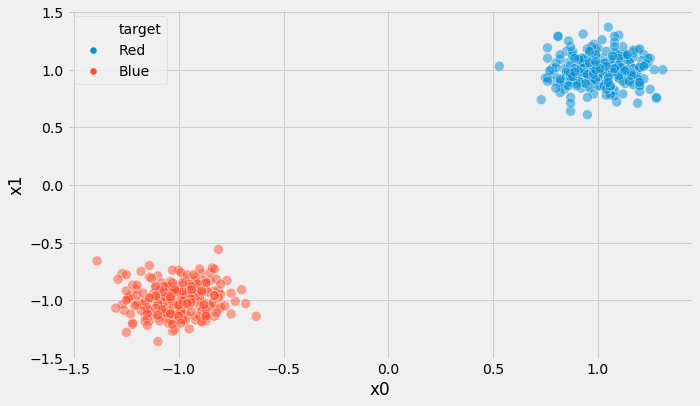

In [31]:
fig, ax = plt.subplots(1,figsize=(10,6))
_=sns.scatterplot(x='x0',y='x1',hue='target', data=df,ax=ax,alpha=.5,s=100)

## #6c Less well separated, $$\sigma = 4$$

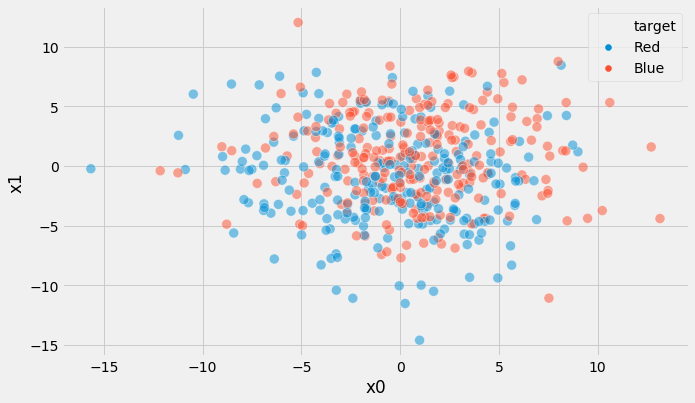

In [32]:
centers = [[1, 1], [-1, -1]]
X, y = make_blobs(n_samples=500, n_features=2, 
        centers=centers, cluster_std=4, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
df = pd.DataFrame({'x0':X.T[0], 
                   'x1':X.T[1],
                   'y': y,
                   'target':(np.array(['Blue','Red'])[y])})
fig, ax = plt.subplots(1,figsize=(10,6))
_=sns.scatterplot(x='x0',y='x1',hue='target', data=df,ax=ax,alpha=.5,s=100)

## #6d Perturbed Outer Circle with Blob inner circle
sklearn.datasets.make_circles

In [34]:
import sklearn

In [45]:
X, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)
print(X.shape,'X shape')
print(X.T.shape, 'X.T shape')
print(X[0].shape, 'X[0] shape')
print(X.T[0].shape, 'X.T[0] shape')
df = pd.DataFrame({'x0':X.T[0], 
                   'x1':X.T[1],
                   'y': y,
                   'target':(np.array(['Blue','Red'])[y])})
df.head()

(100, 2) X shape
(2, 100) X.T shape
(2,) X[0] shape
(100,) X.T[0] shape


,x0,x1,y,target
0,-0.876307,0.481754,0,Blue
1,0.992115,-0.125333,0,Blue
2,-0.309017,-0.951057,0,Blue
3,0.637424,0.770513,0,Blue
4,-0.583175,-0.547638,1,Red


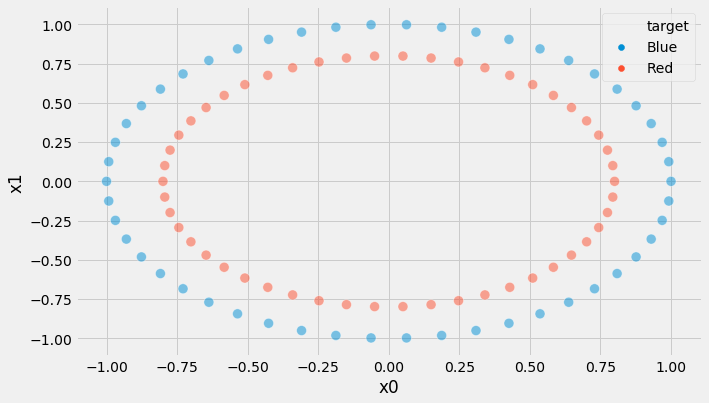

In [46]:
fig, ax = plt.subplots(1,figsize=(10,6))
_=sns.scatterplot(x='x0',y='x1',hue='target', data=df,ax=ax,alpha=.5,s=100)

In [54]:
X, y = sklearn.datasets.make_circles(n_samples=500, shuffle=True, noise=1/8,
                                     random_state=None, factor=0.8)

df = pd.DataFrame({'x0':X.T[0], 
                   'x1':X.T[1],
                   'y': y,
                   'target':(np.array(['Blue','Red'])[y])})
df.head()

,x0,x1,y,target
0,0.427030,0.686073,1,Red
1,1.022381,0.502755,0,Blue
2,0.033771,0.778679,1,Red
3,-0.476129,-0.537236,1,Red
4,-0.336288,-0.781485,0,Blue


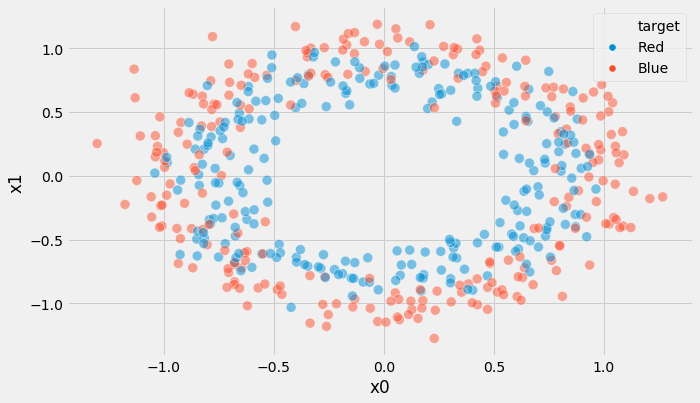

In [55]:
fig, ax = plt.subplots(1,figsize=(10,6))
_=sns.scatterplot(x='x0',y='x1',hue='target', data=df,ax=ax,alpha=.5,s=100)

In [60]:
X, y = sklearn.datasets.make_circles(n_samples=500, shuffle=True, noise=1/8,
                                     random_state=None, factor=0.8)
df = pd.DataFrame({'x0':X.T[0], 
                   'x1':X.T[1],
                   'y': y,
                   'target':(np.array(['Blue','Red'])[y])})

df = df[df['y']==1]
print(df.shape)
df.head()

(250, 4)


,x0,x1,y,target
0,-0.413849,-0.602357,1,Red
3,-0.129983,-0.942060,1,Red
5,0.403869,-0.809430,1,Red
6,0.615175,-0.485917,1,Red
8,-0.255923,0.756092,1,Red


In [63]:
centers = [[0, 0]]
Blob_X, Blob_y = make_blobs(n_samples=250, n_features=2, 
        centers=centers, cluster_std=1.0/8, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

Blob = pd.DataFrame({'x0':Blob_X.T[0], 
                   'x1':Blob_X.T[1],
                   'y': Blob_y,
                   'target':(np.array(['Blue','Red'])[Blob_y])})
print(Blob.shape)
Blob.head()


(250, 4)


,x0,x1,y,target
0,0.090419,0.181405,0,Blue
1,0.150230,0.105430,0,Blue
2,-0.110442,0.214784,0,Blue
3,0.165745,0.007176,0,Blue
4,0.186326,0.006080,0,Blue


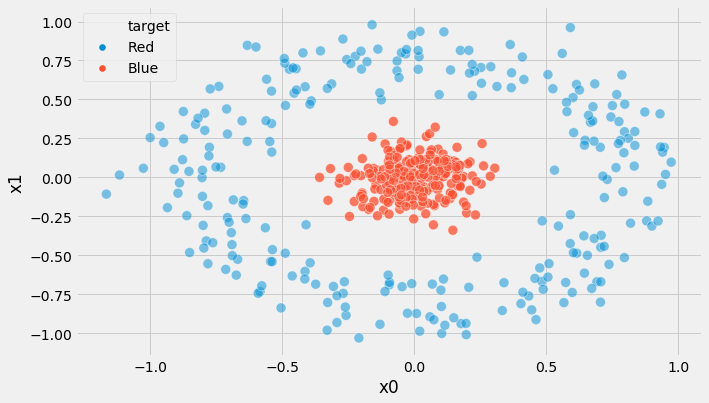

In [65]:
df = df.append(Blob)
fig, ax = plt.subplots(1,figsize=(10,6))
_=sns.scatterplot(x='x0',y='x1',hue='target', data=df,ax=ax,alpha=.5,s=100)